In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
men = df.loc[df['Sex']=='male']['Survived']
print(men)

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64


In [6]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#What is the distribution of categorical features?


df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
df.groupby(['Pclass','Sex'], as_index=False)[['Survived']].sum()

,Pclass,Sex,Survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


## Groupby use case

In [10]:
df.groupby(['Pclass'], as_index=False)[['Pclass','Survived']].mean().sort_values(by ='Survived',ascending = False)

,Pclass,Survived
0,1.0,0.629630
1,2.0,0.472826
2,3.0,0.242363


We see that pclass = 1 has more survival rate 

In [11]:
df.groupby(['Sex'],as_index=False)[['Survived','Sex']].mean()

# we can see 74 % of survived are females 

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Correlating numerical features¶


A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns

In [12]:
d1 = df.loc[df['Survived']==1]['Age']
d2 = df.loc[df['Survived']==0]['Age']
d1

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

(array([27.,  9.,  4., 15., 27., 36., 30., 35., 35., 17., 12., 12., 14.,
         7.,  5.,  4.,  0.,  0.,  0.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

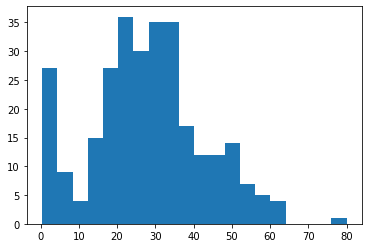

In [13]:
plt.hist(d1,bins=20)

(array([13.,  5., 11.,  5., 51., 48., 56., 54., 30., 34., 28., 17., 23.,
        15.,  7.,  8.,  7.,  6.,  2.,  4.]),
 array([ 1.  ,  4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 ,
        33.85, 37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05,
        66.7 , 70.35, 74.  ]),
 <BarContainer object of 20 artists>)

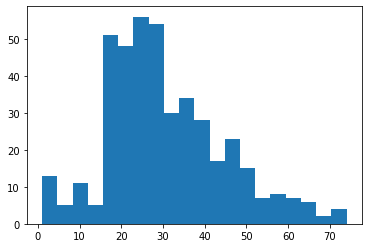

In [14]:
plt.hist(d2,bins=20)

From these histograms we see some infants and age between 20 - 40 has a better survival rate 

In [15]:
#df.columns

sus_col = ['PassengerId','Name','Ticket','Cabin']

df.drop(sus_col, axis=1,inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# looking for missing values 


df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

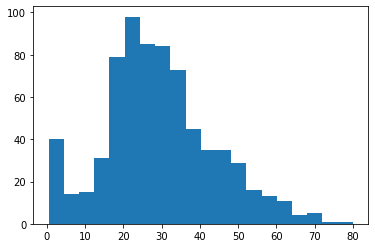

In [18]:
# How to handle age missing values and which is the best way to fill it ?

# lets see at age histogram 


plt.hist(df['Age'],bins=20)

In [19]:
df_test = pd.read_csv('test.csv')

In [20]:
df_test.drop(sus_col, axis=1,inplace=True)

In [21]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [22]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

## Converting a categorical feature¶


Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.



In [23]:
combine = [df, df_test]


for d in combine:
    d['Sex'] = d['Sex'].map({'female':1,'male':0}).astype('int')
    


df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [24]:
#filling missing values in age using mean 

df['Age'] = df['Age'].fillna(df['Age'].mean())

df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())



In [25]:
# converting age into sub categories, data normalization 

df['AgeBand'] = pd.cut(df['Age'],5)

In [26]:
df.groupby(['AgeBand'],as_index=False)[['Survived','AgeBand']].mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [27]:
# converting them into numbers 


for d in combine:
    
    d.loc[d['Age']<= 16 , 'Age']= 0
    
    d.loc[(d['Age']> 16) & (d['Age']<=32), 'Age'] = 1 
    
    d.loc[(d['Age']> 32) & (d['Age']<=48), 'Age'] = 2
    
    d.loc[(d['Age']> 48) & (d['Age']<=64), 'Age'] = 3
    
    d.loc[(d['Age']> 64) & (d['Age']<=80), 'Age'] = 4

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,"(32.252, 48.168]"


In [28]:
df.drop('AgeBand',axis=1,inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,7.2500,S
1,1,1,1,2.0,1,0,71.2833,C
2,1,3,1,1.0,0,0,7.9250,S
3,1,1,1,2.0,1,0,53.1000,S
4,0,3,0,2.0,0,0,8.0500,S


In [30]:
df['FareBand'] = pd.qcut(df['Fare'],5)

In [31]:
df.groupby(['FareBand'])[['Survived','FareBand']].mean()

,Survived
FareBand,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


In [32]:
# converting them into numbers 


for d in combine:
    
    d.loc[d['Fare']<= 7.8 , 'Fare']= 0
    
    d.loc[(d['Fare']> 7.8) & (d['Fare']<=10.5), 'Fare'] = 1 
    
    d.loc[(d['Fare']> 10.5) & (d['Fare']<=21.6), 'Fare'] = 2
    
    d.loc[(d['Fare']> 21.6) & (d['Fare']<=39.7), 'Fare'] = 3
    
    d.loc[(d['Fare']> 39.7) & (d['Fare']<=512.3), 'Fare'] = 4
    
    d.loc[d['Fare']> 512.3 , 'Fare']= 5 
df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBand
0,0,3,0,1.0,1,0,0.0,S,"(-0.001, 7.854]"
1,1,1,1,2.0,1,0,4.0,C,"(39.688, 512.329]"
2,1,3,1,1.0,0,0,1.0,S,"(7.854, 10.5]"
3,1,1,1,2.0,1,0,4.0,S,"(39.688, 512.329]"
4,0,3,0,2.0,0,0,1.0,S,"(7.854, 10.5]"


In [33]:
df.drop('FareBand',axis=1,inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,S
1,1,1,1,2.0,1,0,4.0,C
2,1,3,1,1.0,0,0,1.0,S
3,1,1,1,2.0,1,0,4.0,S
4,0,3,0,2.0,0,0,1.0,S


In [35]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#do it for test data too 
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

In [36]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [37]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
df_test['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,S
1,1,1,1,2.0,1,0,4.0,C
2,1,3,1,1.0,0,0,1.0,S
3,1,1,1,2.0,1,0,4.0,S
4,0,3,0,2.0,0,0,1.0,S


In [40]:
for d in combine:
    
    d.loc[d['Embarked']=='C','Embarked'] = 0 
    
    d.loc[d['Embarked']=='Q','Embarked'] = 1
    
    d.loc[d['Embarked']=='S','Embarked'] = 2

df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,2
1,1,1,1,2.0,1,0,4.0,0
2,1,3,1,1.0,0,0,1.0,2
3,1,1,1,2.0,1,0,4.0,2
4,0,3,0,2.0,0,0,1.0,2



# Modelling 

In [45]:
from sklearn.ensemble import RandomForestClassifier

X_train = df.drop('Survived',axis=1)

y_train = df['Survived']

X_test = df_test.copy()




In [49]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

model.score(X_train, y_train)

acc_random_forest = round(model.score(X_train, y_train) * 100, 2)
acc_random_forest

88.33

In [51]:
df_test['Survived']=y_pred

In [54]:
df_1 = pd.read_csv('test.csv')

In [55]:
submission = pd.DataFrame({
        "PassengerId": df_1["PassengerId"],
        "Survived": y_pred})

In [56]:
submission.he

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
submission.to_csv('submission1.csv', index=False)